# Heart Attack Prediction and Risk Identification

### Introduction:

This document presents an analysis and prediction of heart attack data, focusing on identifying the risk of heart attacks among elderly individuals in advance based on certain features. It comprises various sections, each addressing relevant subtasks for building predictive models.

### Libraries Import and Data Load:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
# Set the style of the plot
sns.set(style="whitegrid")

In [3]:
data_v1 = pd.read_csv("heart_attack_prediction_dataset.csv")

### Data Exploration Analyis:

In this phase, we thoroughly examine the dataset's features to understand its structure and characteristics. We identify and address any inconsistencies or anomalies through data cleaning. Through techniques like summary statistics and visualization, we aim to uncover patterns and trends. This phase ensures data reliability for further analysis and modeling.

In [4]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

**No missing values.**

In [5]:
data_v1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


filter data by age (age should be at least 60).

In [6]:
data_v1 = data_v1[data_v1.Age >= 60]

Splitting **"Blood Pressure"** into **"Systolic"** and **"Diastolic"**

In [7]:
# Splitting the blood pressure column
data_v1[['Systolic', 'Diastolic']] = data_v1['Blood Pressure'].str.split('/', expand=True)

# dropping blood pressure column
data_v1.drop("Blood Pressure", axis = 1, inplace = True)
# Converting to numerical format
data_v1['Systolic'] = pd.to_numeric(data_v1['Systolic'])
data_v1['Diastolic'] = pd.to_numeric(data_v1['Diastolic'])
data_v1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
count,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.0,3679.000000,3679.000000,3679.000000,3679.000000,...,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000
mean,75.124219,259.153846,74.681979,0.645284,0.496059,1.0,0.494971,0.595270,10.008557,0.500408,...,5.541451,6.039072,157911.091329,28.893580,418.893721,3.500951,7.007339,0.361239,135.324545,84.804566
std,9.065201,80.316013,20.459073,0.478492,0.500052,0.0,0.500043,0.490906,5.783317,0.500068,...,2.863461,3.454878,80605.568054,6.280261,224.846196,2.257833,2.005078,0.480425,26.461955,14.520414
min,60.000000,120.000000,40.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.005109,0.000000,...,1.000000,0.015910,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,67.000000,193.000000,57.000000,0.000000,0.000000,1.0,0.000000,0.000000,4.972897,0.000000,...,3.000000,3.066458,87570.000000,23.506648,225.500000,2.000000,5.000000,0.000000,113.000000,72.000000
50%,75.000000,258.000000,75.000000,1.000000,0.000000,1.0,0.000000,1.000000,10.053990,1.000000,...,6.000000,6.047117,157685.000000,28.818777,419.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,83.000000,327.000000,93.000000,1.000000,1.000000,1.0,1.000000,1.000000,15.072860,1.000000,...,8.000000,8.955100,227657.000000,34.207534,616.000000,5.000000,9.000000,1.000000,159.000000,97.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.0,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299909.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


#### Data Exploration:

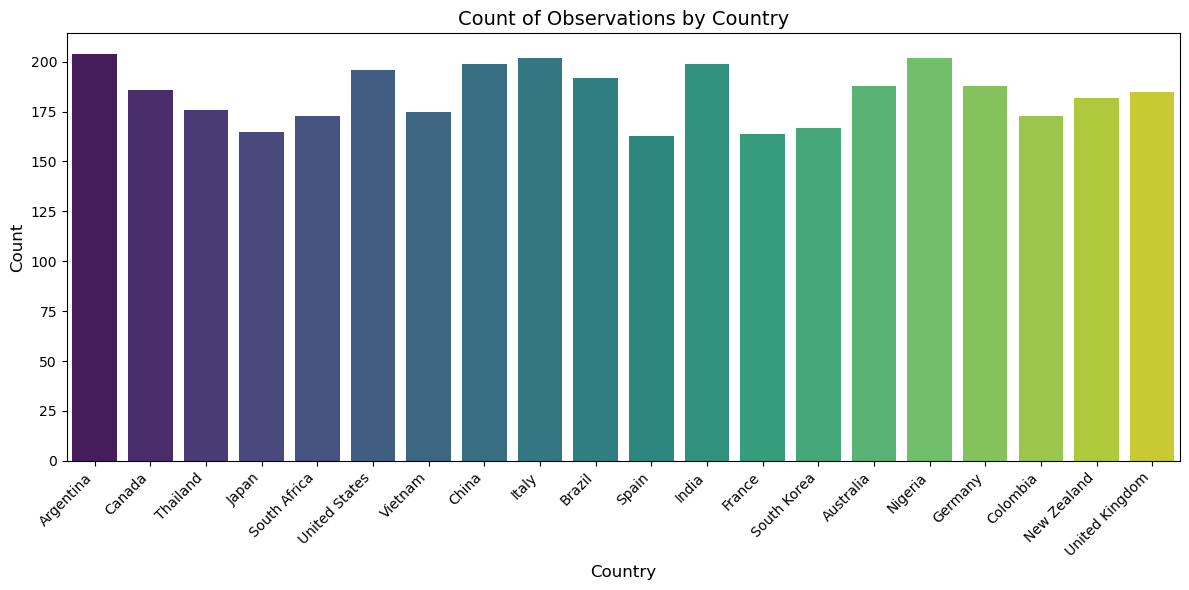

In [125]:
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=data_v1, palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Observations by Country', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

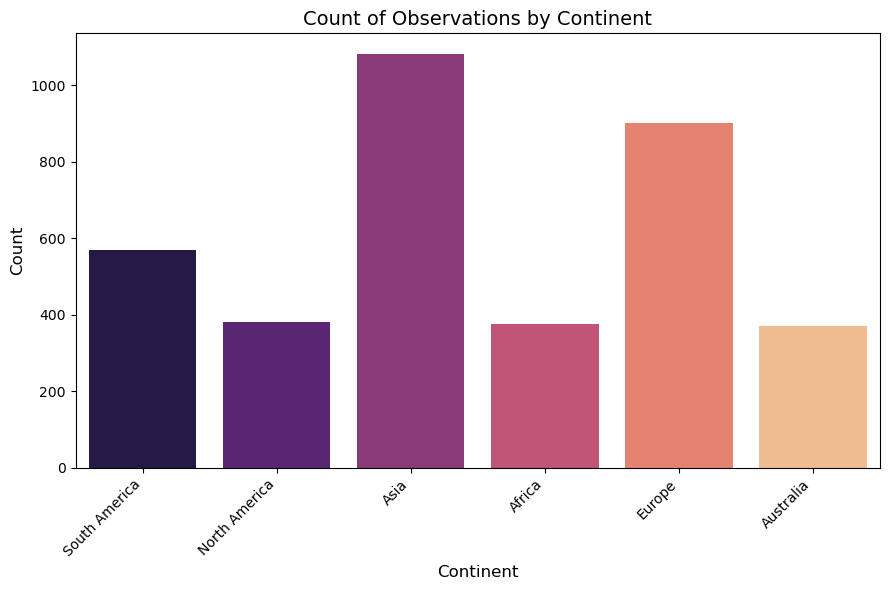

In [126]:
# Plot using seaborn
plt.figure(figsize=(9, 6))
sns.countplot(x='Continent', data=data_v1, palette='magma')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Observations by Continent', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data is distributed well geographically. It is collected from different country all over the world.

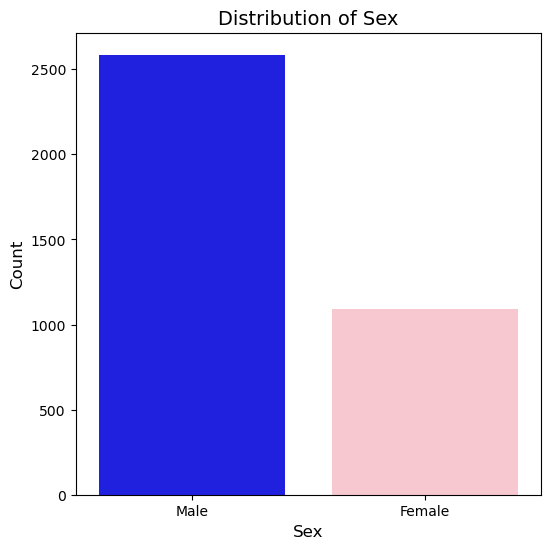

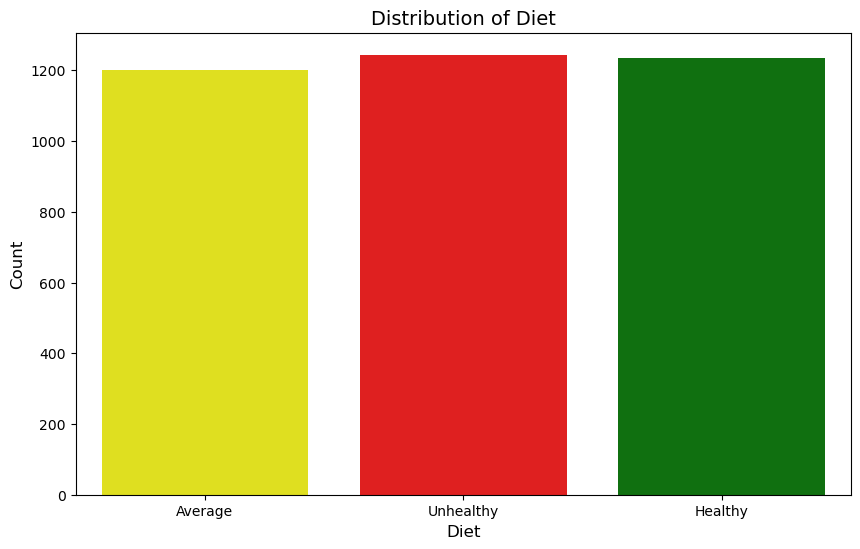

In [83]:
# Plot count plot for Sex variable
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=data_v1, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sex', fontsize=14)
plt.show()

# Plot count plot for Diet variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Diet', data=data_v1, palette={'Healthy': 'green', 'Average': 'yellow', 'Unhealthy': 'red'})
plt.xlabel('Diet', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diet', fontsize=14)
plt.show()

The distribution of Diet is uniform.
The male candidates constitude almost double observations of females. We will investigate this later, we might consider undersampling for the male observations. For now, we will move on.

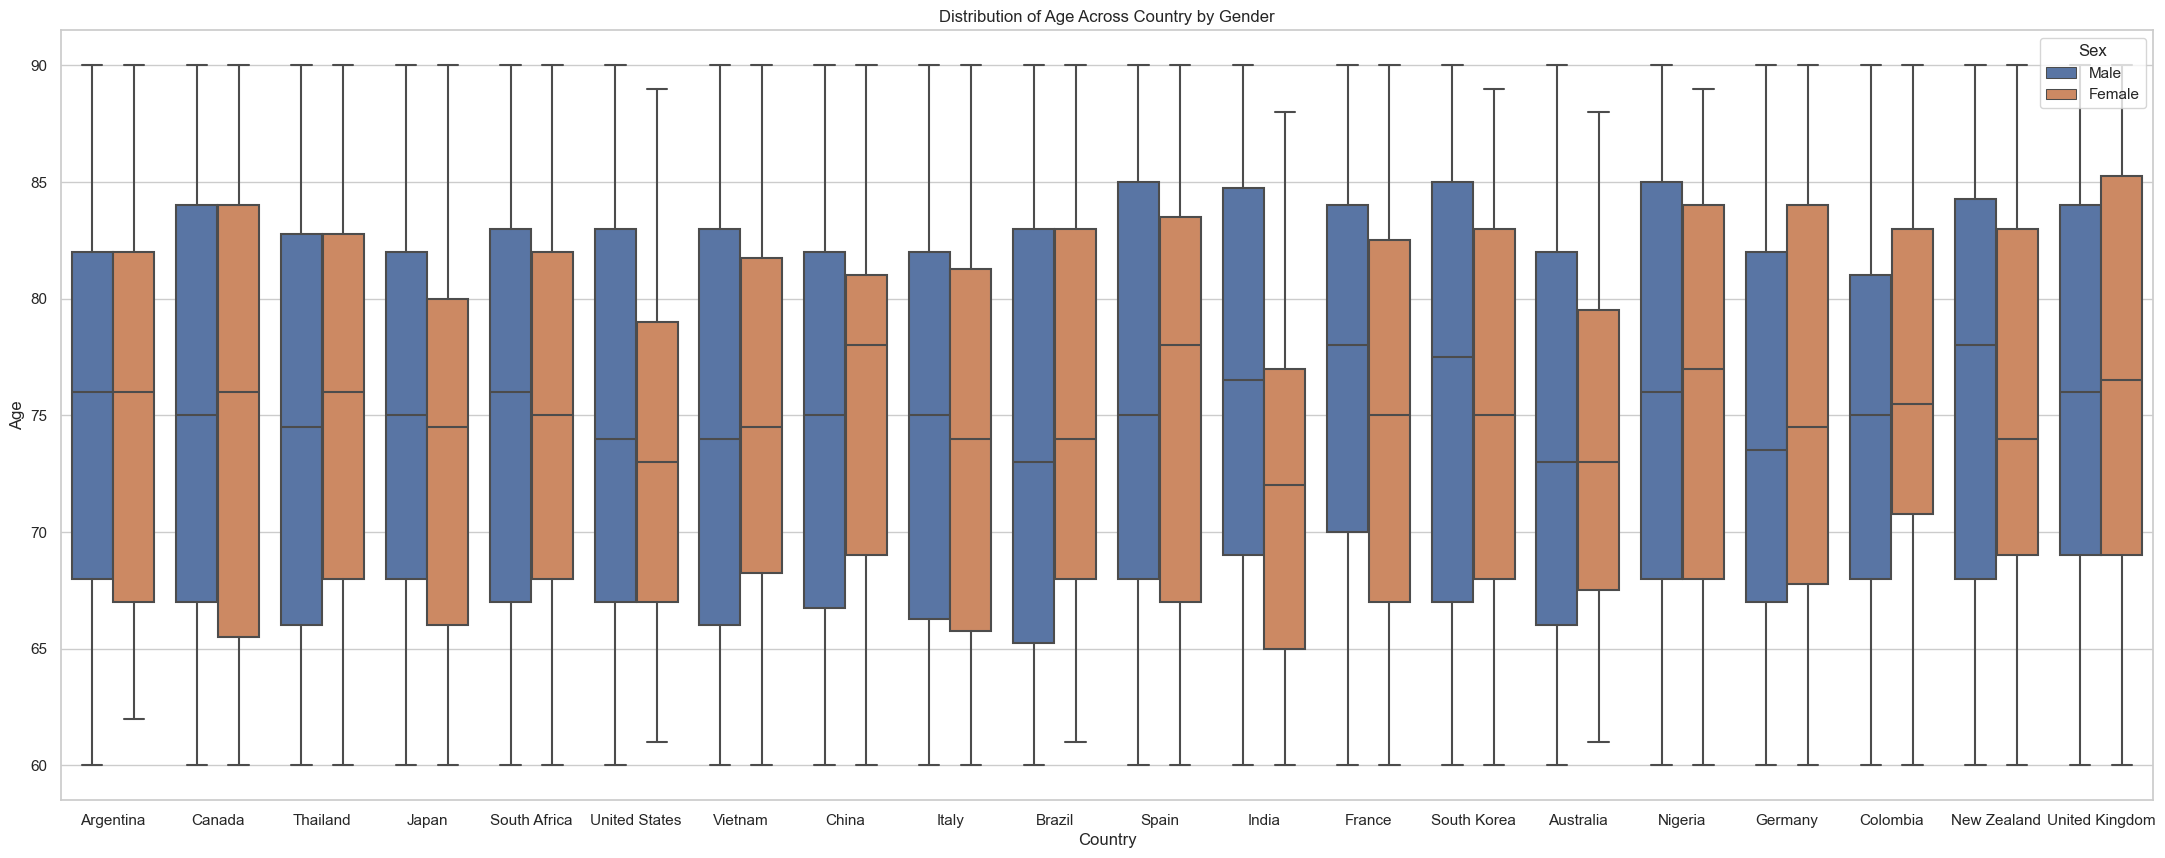

In [183]:
plt.figure(figsize=(27, 10))
sns.boxplot(data=data_v1, x="Country", y="Age", hue="Sex")
plt.title('Distribution of Age Across Country by Gender')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper right')
plt.show()

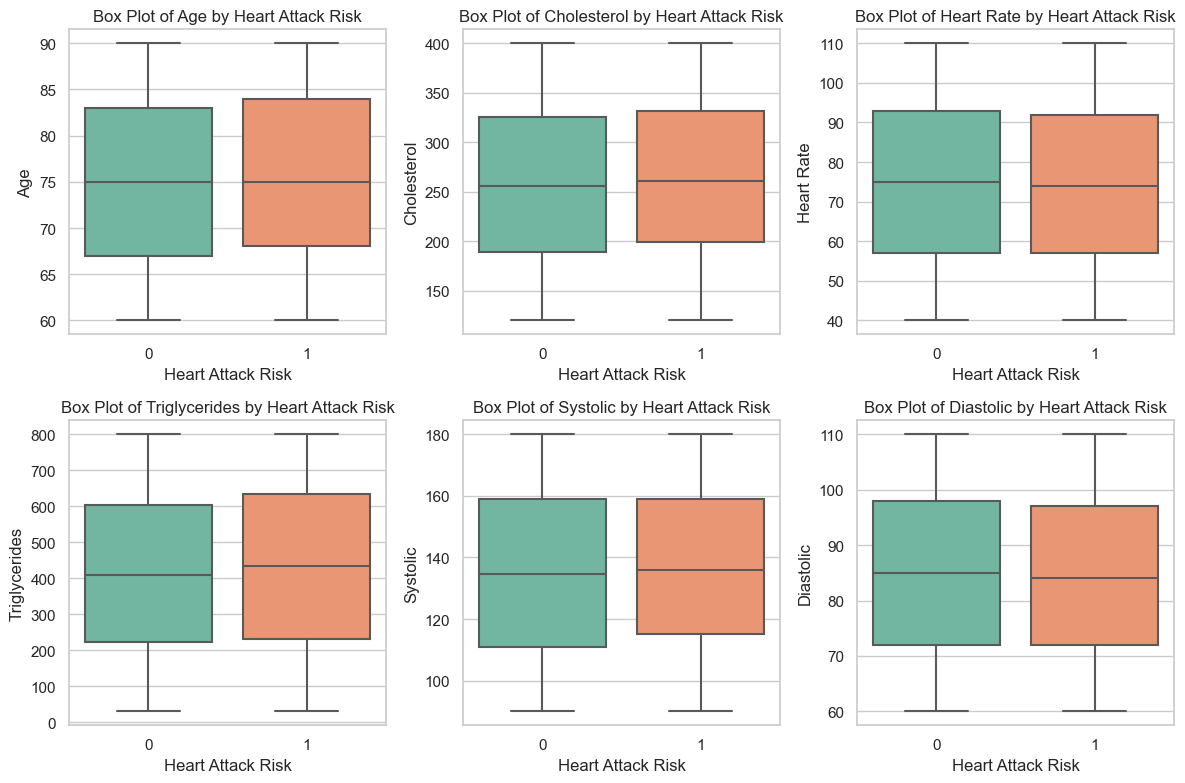

In [146]:
# Select variables for box plot analysis
boxplot_vars = ['Age', 'Cholesterol', 'Heart Rate', 'Triglycerides', 'Systolic', 'Diastolic']

# Create box plots for each variable
plt.figure(figsize=(12, 8))
for i, var in enumerate(boxplot_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Heart Attack Risk', y=var, data=data_v1, palette='Set2')
    plt.title(f'Box Plot of {var} by Heart Attack Risk')
    plt.xlabel('Heart Attack Risk')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


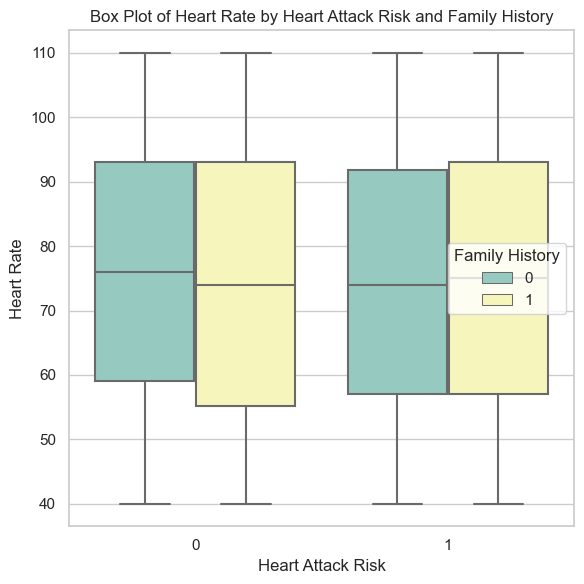

In [188]:
# Example: Advanced box plots grouped by diabetes status
plt.figure(figsize=(6, 6))
sns.boxplot(x='Heart Attack Risk', y='Heart Rate', hue='Family History', data=data_v1, palette='Set3')
plt.title('Box Plot of Heart Rate by Heart Attack Risk and Family History')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Heart Rate')
plt.legend(title='Family History')
plt.tight_layout()
plt.show()

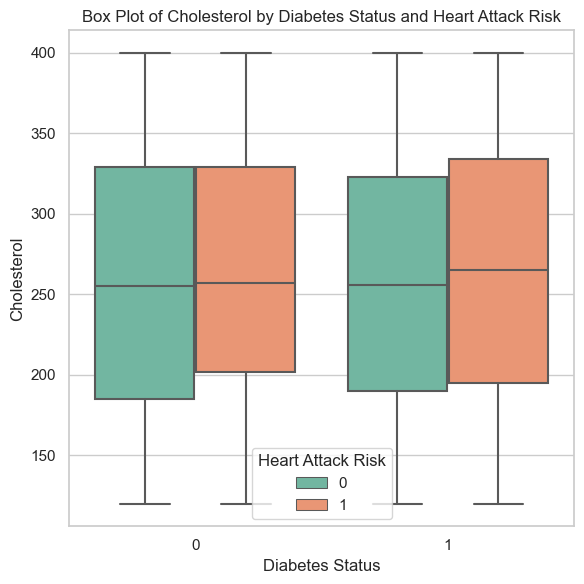

In [189]:
# Example: Advanced box plots grouped by diabetes status
plt.figure(figsize=(6, 6))
sns.boxplot(x='Diabetes', y='Cholesterol', hue='Heart Attack Risk', data=data_v1, palette='Set2')
plt.title('Box Plot of Cholesterol by Diabetes Status and Heart Attack Risk')
plt.xlabel('Diabetes Status')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack Risk')
plt.tight_layout()
plt.show()

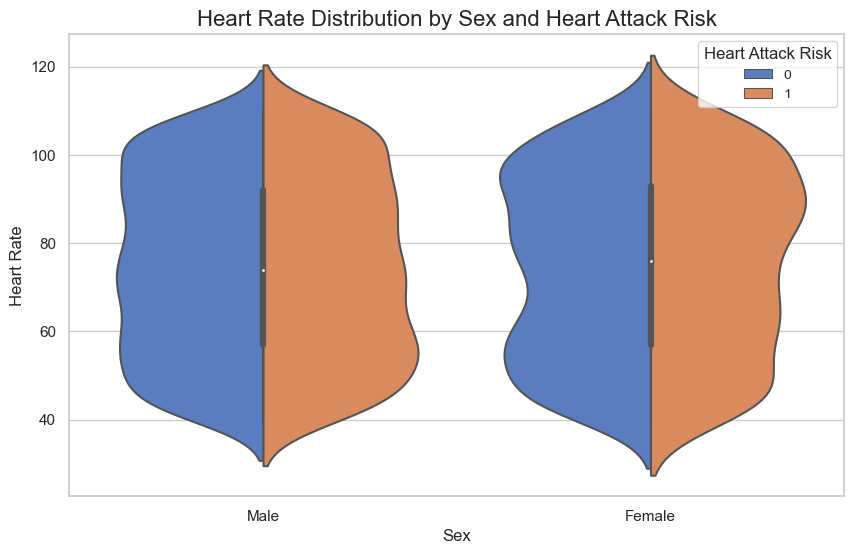

In [199]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Sex", y="Heart Rate", hue="Heart Attack Risk", data=data_v1, palette="muted", split=True)
plt.title('Heart Rate Distribution by Sex and Heart Attack Risk', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Heart Rate', fontsize=12)
plt.legend(title='Heart Attack Risk', fontsize=10)
plt.show()

It suggests that there might be a significant difference in heart rate distribution between males and females, especially when considering the risk of heart attack. 

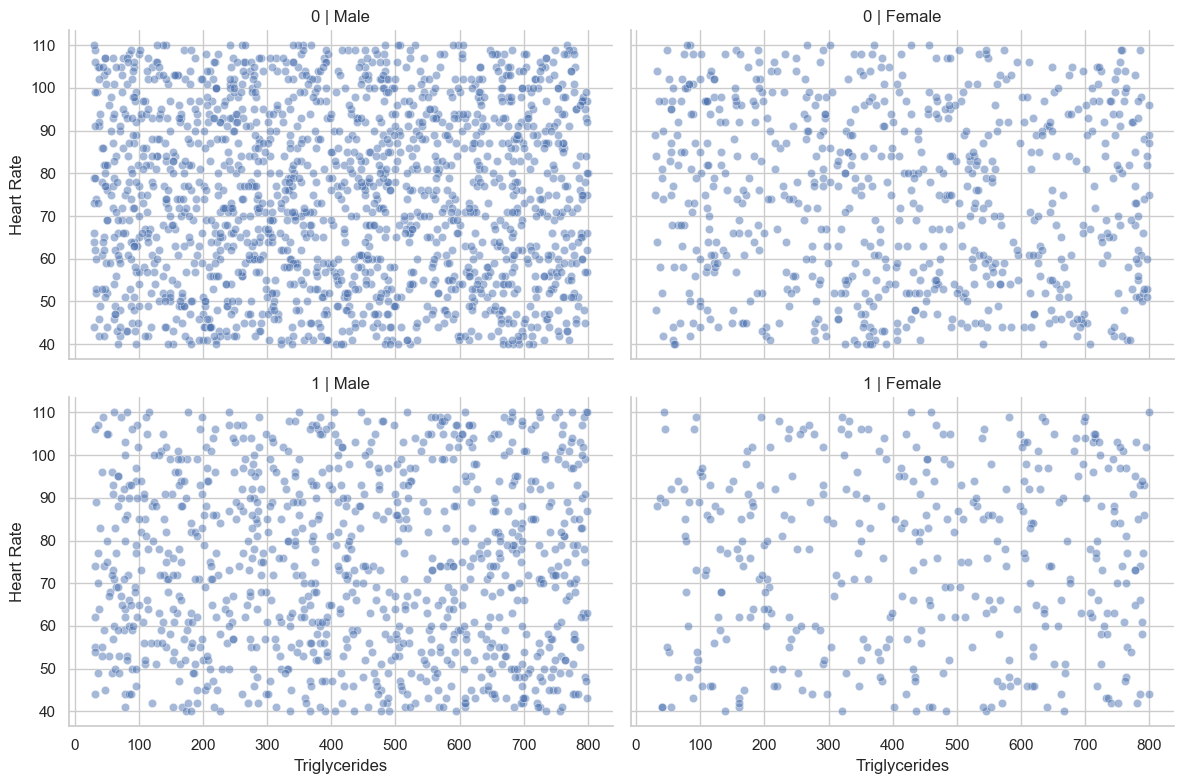

In [197]:
# Create facet grid
facet_grid = sns.FacetGrid(data=data_v1, col='Sex', row='Heart Attack Risk', height=4, aspect=1.5)

# Map scatter plot to facet grid
facet_grid.map(sns.scatterplot, 'Triglycerides', 'Heart Rate', alpha=0.5)

# Add titles
facet_grid.set_titles(row_template='{row_name}', col_template='{col_name}')

# Add axis labels
facet_grid.set_axis_labels('Triglycerides', 'Heart Rate')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

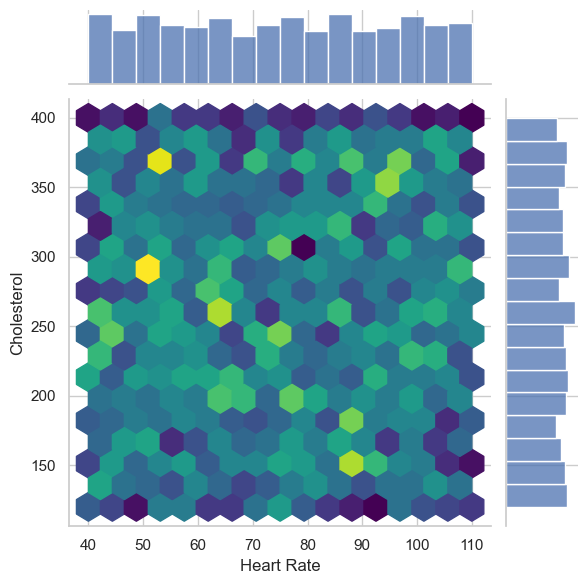

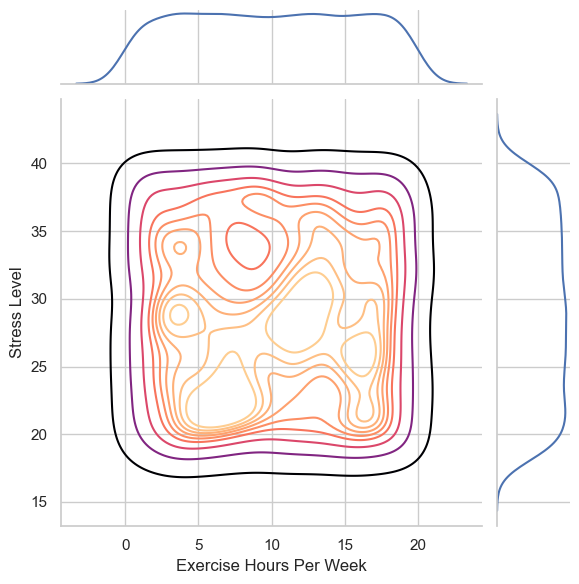

In [198]:
# Create joint plot for Heart Rate and Cholesterol
sns.jointplot(x='Heart Rate', y='Cholesterol', data=data_v1, kind='hex', cmap='viridis')
plt.xlabel('Heart Rate')
plt.ylabel('Cholesterol')
plt.show()

# Create joint plot for Exercise Hours Per Week and Stress Level
sns.jointplot(x='Exercise Hours Per Week', y='BMI', data=data_v1, kind='kde', cmap='magma')
plt.xlabel('Exercise Hours Per Week')
plt.ylabel('Stress Level')
plt.show()


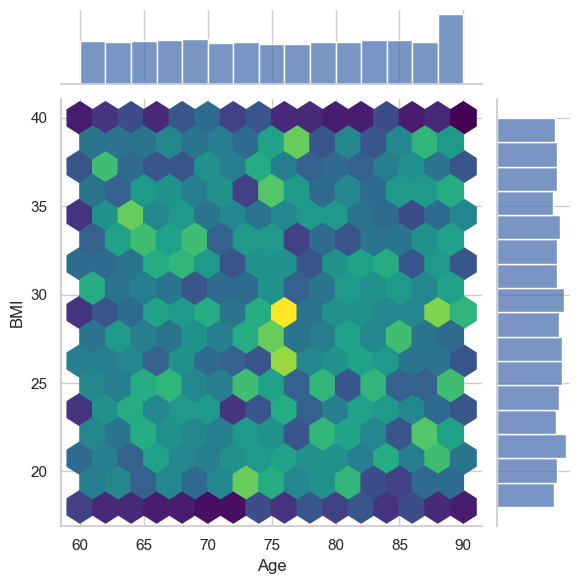

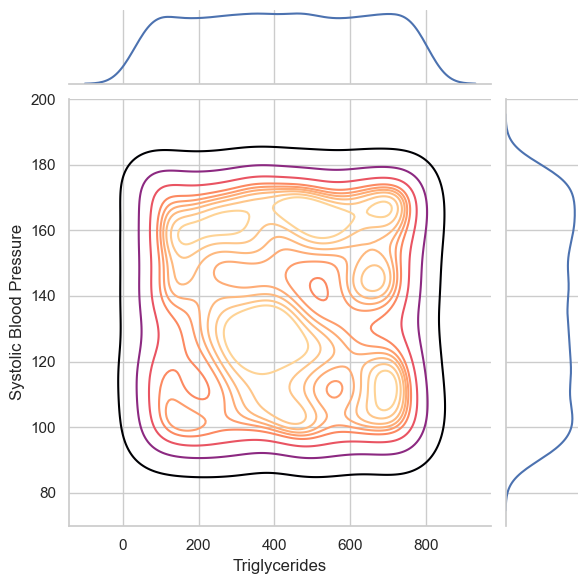

In [171]:
# Create joint plot for Age and BMI
sns.set(style="whitegrid")

sns.jointplot(x='Age', y='BMI', data=data_v1, kind='hex', cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Create joint plot for Triglycerides and Systolic Blood Pressure
sns.jointplot(x='Triglycerides', y='Systolic', data=data_v1, kind='kde', cmap='magma')
plt.xlabel('Triglycerides')
plt.ylabel('Systolic Blood Pressure')
plt.show()

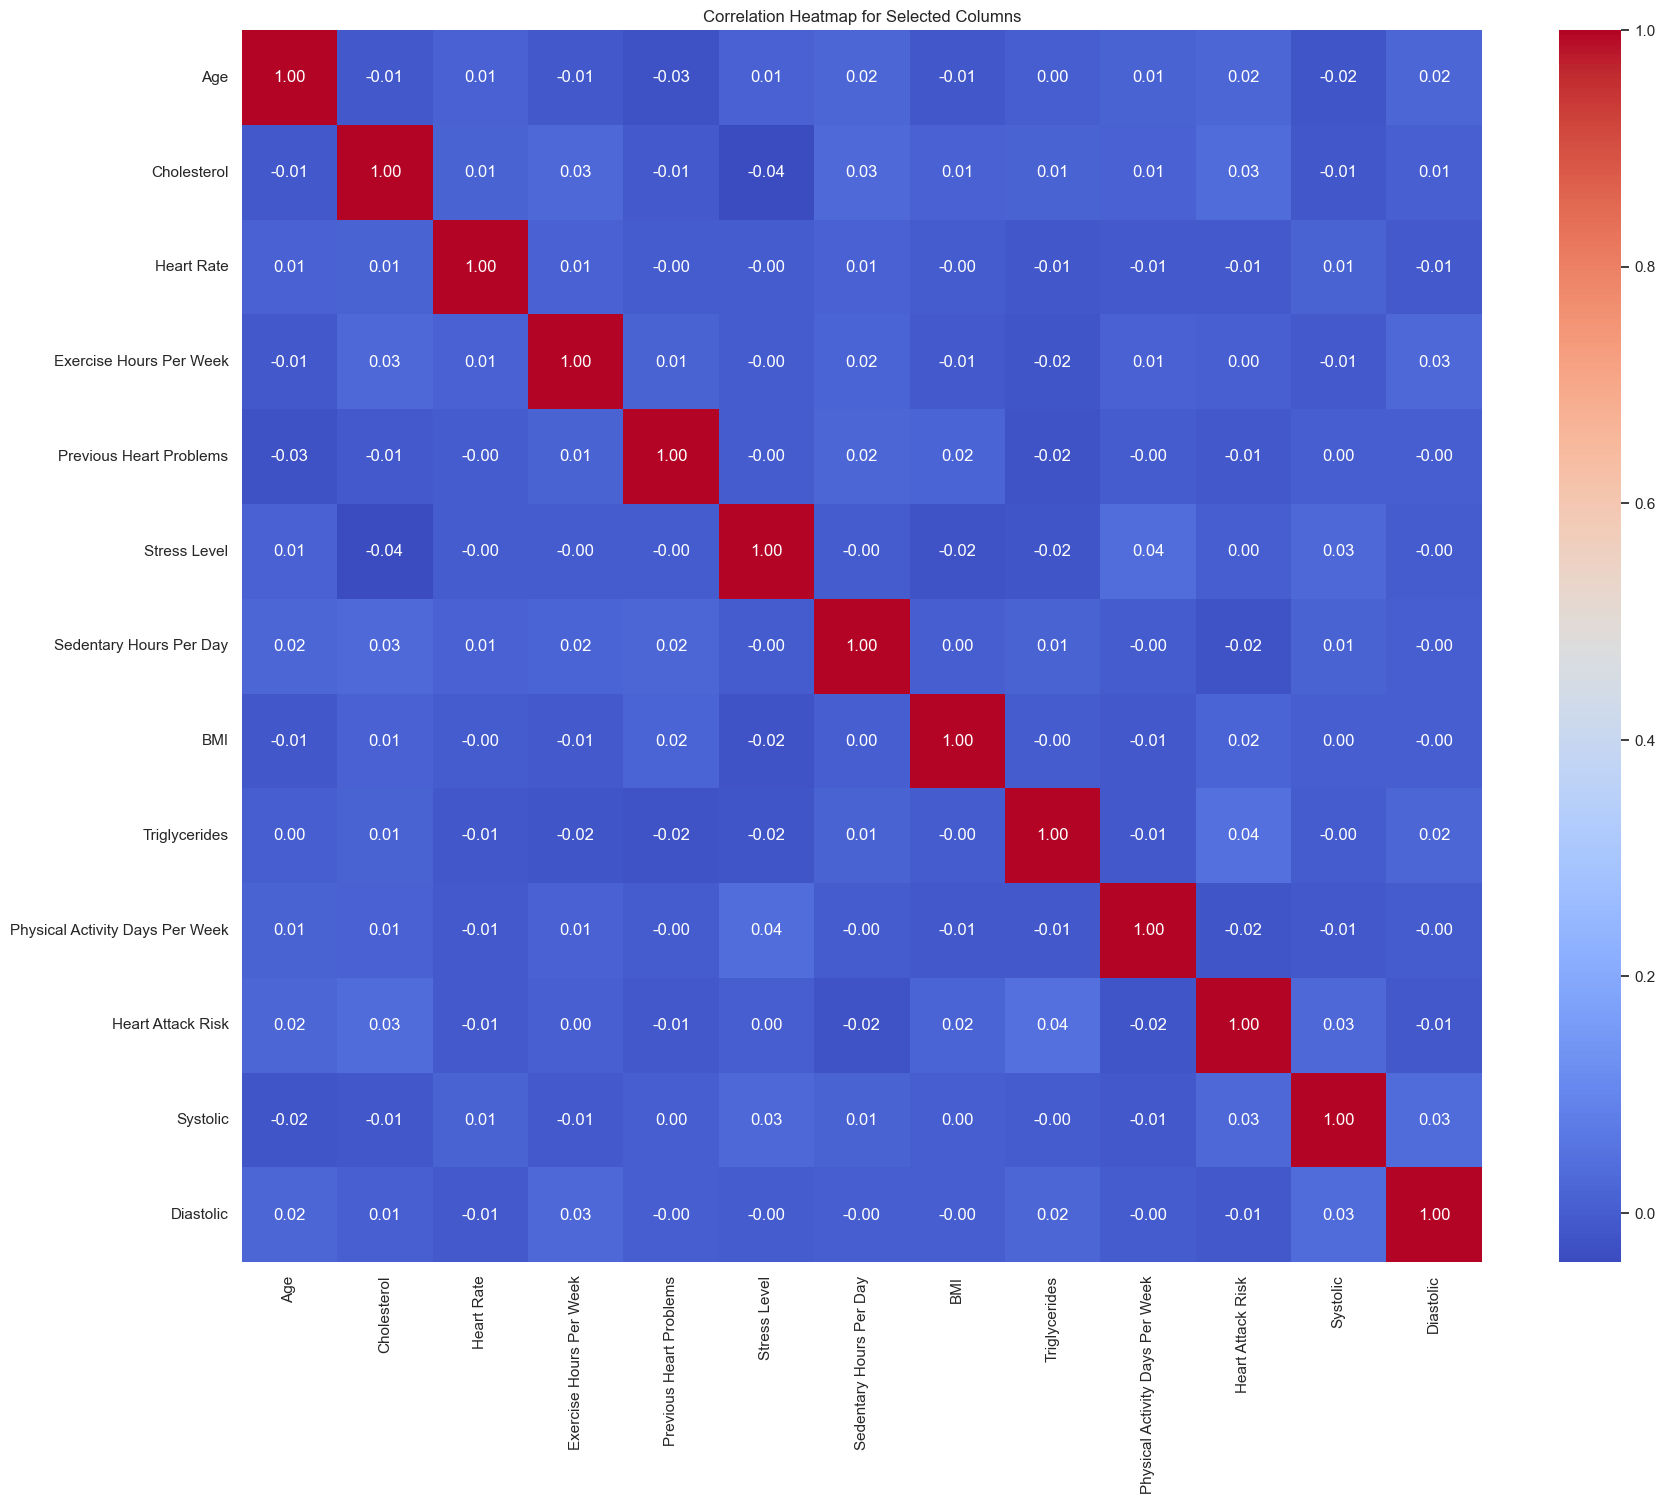

In [12]:
corr_matrix = data_v1[['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Heart Attack Risk', 'Systolic', 'Diastolic']].corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

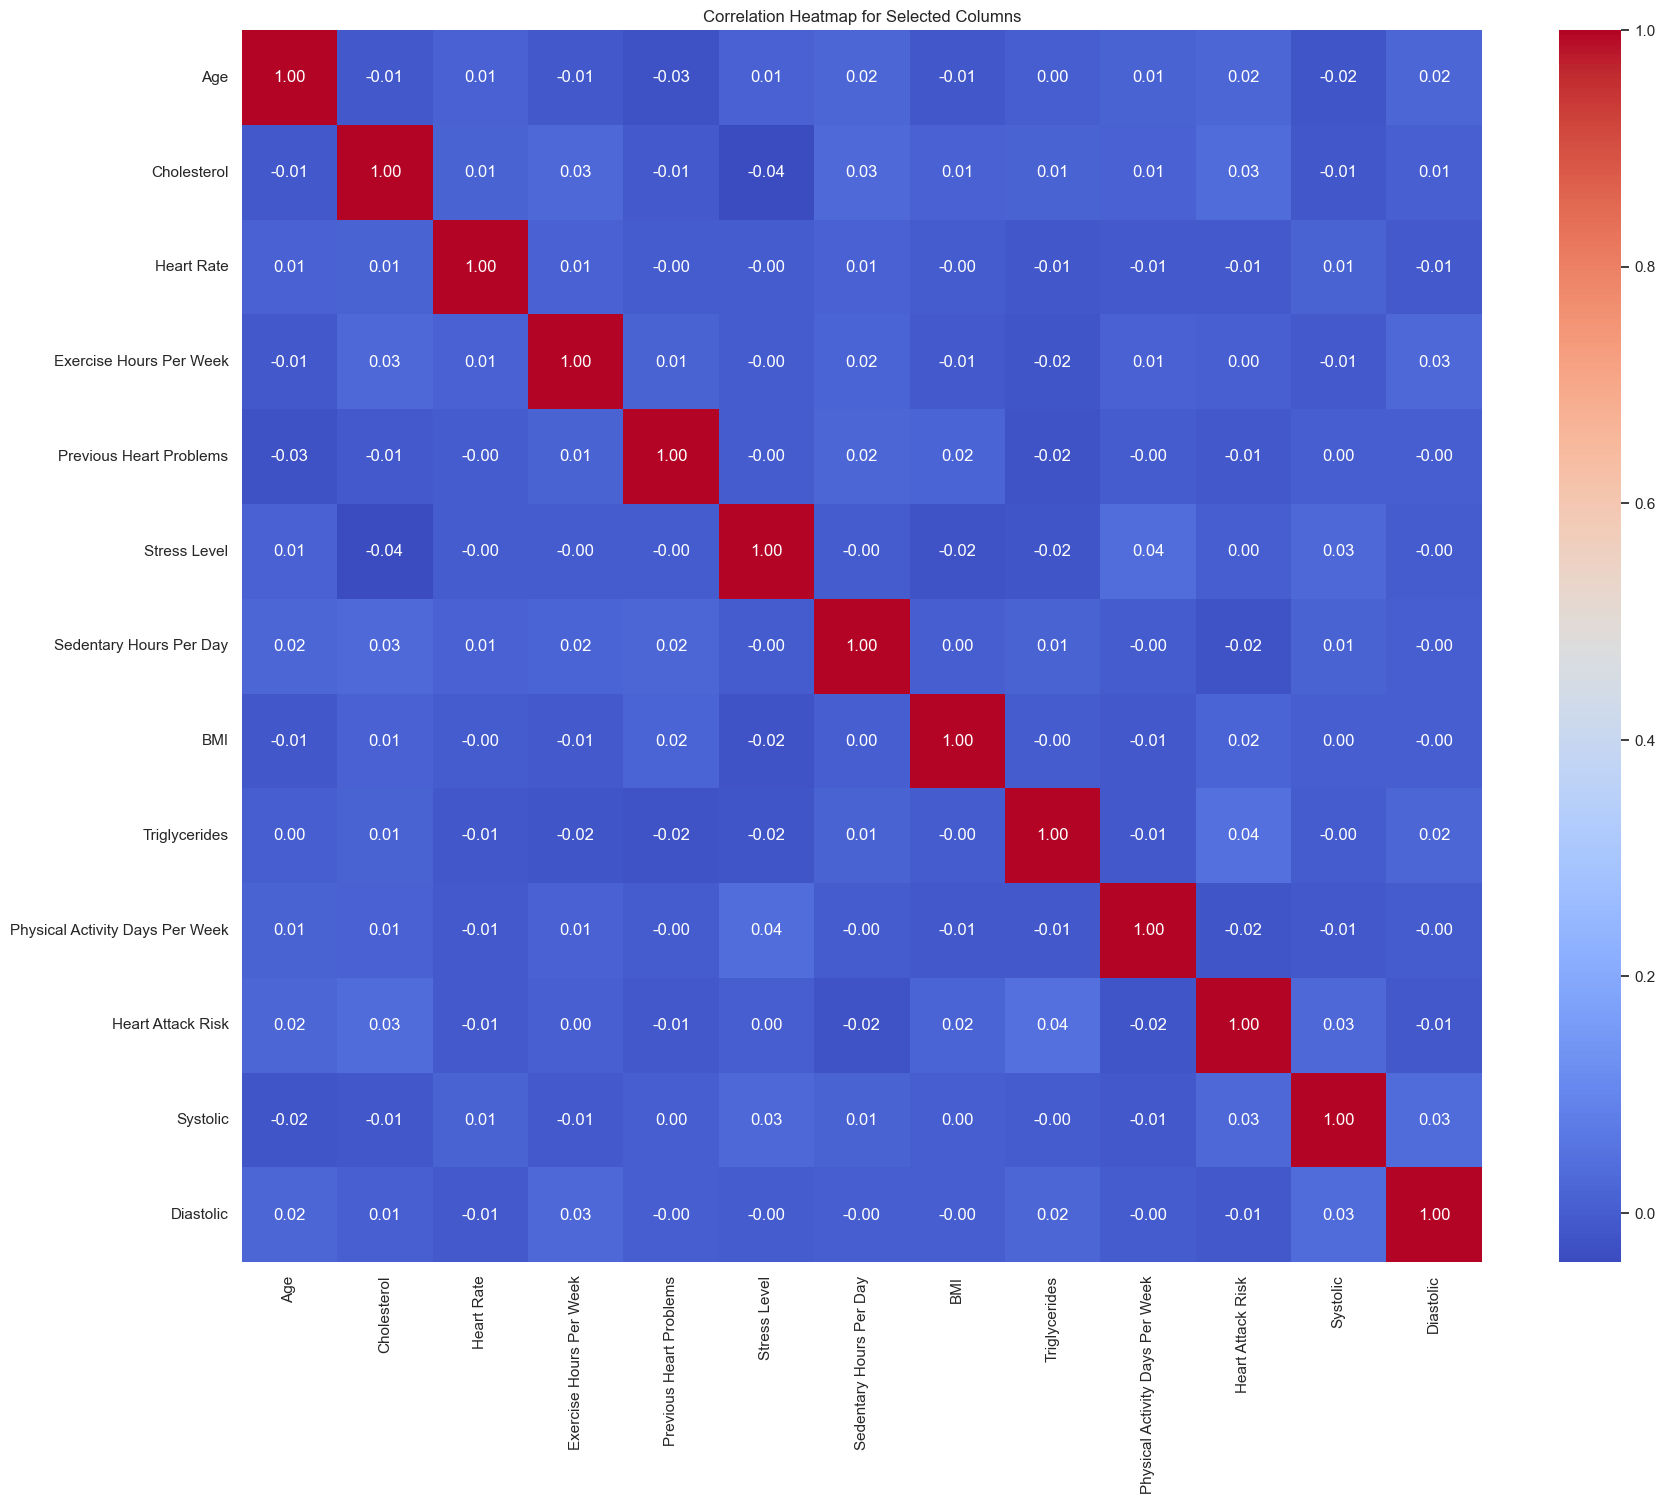

In [12]:
corr_matrix = data_v1[['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Heart Attack Risk', 'Systolic', 'Diastolic']].corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

In [130]:
data_v1.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

As male constitutes 70% of the data, It might be biased. However, we will leave for now, and we will do undersampling later and compare model performance with or without underampling.

Also, these features *Age*, *Cholesterol*, *Heart Rate*, *Diabetes*, *Family History*, *Obesity*, *Alcohol Consumption*, *Exercise Hours Per Week*, *Previous Heart Problems*, *Medication Use*, *Stress Level*, *Sedentary Hours Per Day*, *Income*, *BMI*, *Triglycerides*, *Physical Activity Days Per Week* and *Sleep Hours Per Day* have good structure. From the first glance they look out of outliers.

Smoking feature can't be taken into consideration in modelling as it's fully biased.

Let's encode the Diet and the Sex variables using ordinal encoding, and the Country variable using one-hot encoding

In [85]:
# Define the mapping of diet categories to numerical values
diet_mapping = {'Healthy': 3, 'Average': 2, 'Unhealthy': 1}
# Apply ordinal encoding to the 'Diet' column
data_v1['Diet'] = data_v1['Diet'].map(diet_mapping)

Sex_mapping = {'Male': 1, 'Female': 0}
# Apply ordinal encoding to the 'Diet' column
data_v1['Sex'] = data_v1['Sex'].map(Sex_mapping)

data_v1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
6,WYV0966,90,1,358,102/73,84,0,0,1,0,...,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1,102,73
7,XXM0972,84,1,220,131/68,107,0,0,1,1,...,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1,131,68


## Encode the country variable

In [ ]:
# Perform one-hot encoding for the 'Country' column
data_v1 = pd.get_dummies(data_v1, columns=['Country'], drop_first=True)

In [50]:
value_counts('Continent')

,Value,Count,Percentage
Continent,,,
Asia,Asia,1081,29.4
Europe,Europe,902,24.5
South America,South America,569,15.5
North America,North America,382,10.4
Africa,Africa,375,10.2
Australia,Australia,370,10.1


Data are collected from all over the world equally. 

In [106]:
data_v1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
6,WYV0966,90,1,358,102/73,84,0,0,1,0,...,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1,102,73
7,XXM0972,84,1,220,131/68,107,0,0,1,1,...,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1,131,68


## Normalization

In [107]:
# Select columns for Min-Max Scaling
columns_to_normalize = ['Cholesterol', 'Income', 'Triglycerides']

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to selected columns
data_v2 = data_v1.copy()  # Create a copy of the original dataframe
data_v2[columns_to_normalize] = min_max_scaler.fit_transform(data_v2[columns_to_normalize])


data_v2.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.233333,1,0.314286,158/88,0.457143,0,0,1,0,...,0.602363,0.332468,0,6,Argentina,South America,Southern Hemisphere,0,0.755556,0.56
3,JLN3497,0.800000,1,0.939286,163/100,0.471429,1,1,1,0,...,0.839394,0.451948,3,4,Canada,North America,Northern Hemisphere,0,0.811111,0.80
4,GFO8847,0.200000,1,0.707143,91/88,0.757143,1,1,1,1,...,0.173077,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0,0.011111,0.56
6,WYV0966,1.000000,1,0.850000,102/73,0.628571,0,0,1,0,...,0.494819,0.329870,4,10,Canada,North America,Northern Hemisphere,1,0.133333,0.26
7,XXM0972,0.800000,1,0.357143,131/68,0.957143,0,0,1,1,...,0.191841,0.441558,6,7,Japan,Asia,Northern Hemisphere,1,0.455556,0.16
